In [1]:
import iris
import sklearn
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import iris.quickplot as qplt
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, MDS
%matplotlib inline  

In [2]:
def load_temp(n):
    crut_file = "/Users/admin/Downloads/HadCRUT.4.4.0.0.anomalies.1_to_10_netcdf/HadCRUT.4.4.0.0.anomalies.%d.nc"%n
    crut = iris.load(crut_file)
    temp = crut[0]
    for t in range(temp.data.shape[0]):
        temp.data[t] = temp.data[t] / max(temp.data[t].max(), -temp.data[t].min())
        temp.data[t].set_fill_value(temp.data[t].mean())
    return temp

temps = []
for i in range(1,11):
    temps.append(load_temp(i))
temps

/Users/admin/miniconda2/lib/python2.7/site-packages/iris/fileformats/cf.py:1139: UserWarning: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warnings.warn(msg)


[<iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>]

In [3]:
# def load_temp(n):
#     crut_file = "/Users/admin/Downloads/HadCRUT.4.4.0.0.anomalies.1_to_10_netcdf/HadCRUT.4.4.0.0.anomalies.%d.nc"%n
#     crut = iris.load(crut_file)
#     temp = crut[0]
#     temp.data.set_fill_value(temp.data.mean())
#     norm_temp = temp / max(temp.data.filled().max(), -temp.data.filled().min())
#     norm_temp.data.set_fill_value(norm_temp.data.mean())
#     return norm_temp

# temps = []
# for i in range(1,11):
#     temps.append(load_temp(i))
# temps

In [4]:
def show_tsne(timeseries):
    tsne = TSNE(n_components=2, random_state=0)
    timesteps = timeseries.shape[0]
    pts = timeseries.shape[1] * timeseries.shape[2]
    result = tsne.fit_transform(timeseries.data.filled().reshape(timesteps, pts))
    plt.scatter(result[:, 0], result[:, 1], c=np.arange(timesteps))
    plt.show()

In [5]:
def show_tsne_2(timeseries):
    tsne = TSNE(n_components=2, random_state=0)
    timesteps = timeseries.shape[0] * timeseries.shape[1]
    pts = timeseries.shape[2]
    result = tsne.fit_transform(timeseries.data.filled().reshape(timesteps, pts))
    plt.scatter(result[:, 0], result[:, 1], c=np.arange(timesteps))
    plt.show()

(1995, 2592)


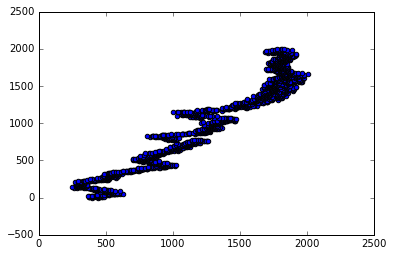

In [42]:
f = np.vectorize(lambda a: int(not a))
ints = np.array(map(f, temps[0].data.mask)).reshape(1995, 36*72)
print ints.shape
result = np.apply_along_axis(sum, 1, ints)
plt.scatter(result, np.arange(result.shape[0]))

In [47]:
def show_both(timeseries):
    show_tsne_2(iris.cube.Cube(np.ma.array(timeseries.data.mask.astype(int))))
    show_tsne_2(timeseries)

In [7]:
# full time series

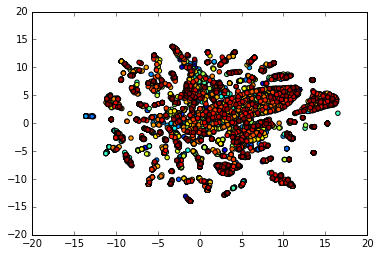

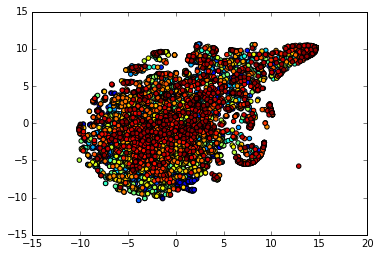

In [48]:
show_both(temps[0][1500:1700,:,:])

In [ ]:
# first half of timesteps

In [ ]:
show_both(temps[0][:temps[0].shape[0]/2,:,:])

In [ ]:
# second half of timesteps

In [ ]:
show_both(temps[0][temps[0].shape[0]/2:,:,:])

In [ ]:
# first quarter of timesteps

In [ ]:
show_both(temps[0][:temps[0].shape[0]/4,:,:])

In [ ]:
show_both(temps[0][temps[0].shape[0]/4:temps[0].shape[0]/2,:,:])

In [ ]:
show_both(temps[0][temps[0].shape[0]/2:3*temps[0].shape[0]/4,:,:])

In [ ]:
show_both(temps[0][3*temps[0].shape[0]/4:,:,:])